In [4]:
import numpy as np
import matplotlib.pylab as plt

In [5]:
def predict(alpha, X, kernel, x):
    K=[]
    for i in range(len(X)):
        K.append(kernel(X[i],x))
    K=np.array(K)
    result = np.dot(alpha,K)
    return result

def loss(alpha, X, kernel, x, y):
    E=np.abs(y-predict(alpha,X,kernel,x))
    return  E

def num_de_dalpha(alpha, X, kernel, x, y, epsilon):
    vect = np.zeros(len(alpha))
    delta = np.identity(len(alpha))*epsilon
    for i in range(len(alpha)):
        vect[i] = (loss(alpha+delta[i,:],X,kernel,x,y)-(loss(alpha-delta[i,:],X,kernel,x,y)))/(2*epsilon)
    return vect

def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

def de_dalpha(alpha, X, kernel, x, y):
    K=[]
    for i in range(len(X)):
        K.append(kernel(X[i],x))
    K=np.array(K)
    de = -np.sign(y-predict(alpha, X, kernel, x))*K
    return de

def test_de_dalpha(kernel):
    num_tests = 100
    epsilon = 0.0001
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    for i in range(num_tests):
        talpha = np.random.randn(len(X))
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dalpha(talpha, X, kernel, tx, ty) - 
                          num_de_dalpha(talpha, X, kernel, tx, ty, epsilon)) > epsilon:
            return False
    return True

def test2():
    return test_de_dalpha(k1) and test_de_dalpha(k2)

In [6]:
test2()

True

In [11]:
def train(X, Y, epochs, eta, alpha_ini, kernel):
    losses = []
    alpha = alpha_ini
    epsilon = 0.00001
    for epoch in range(epochs):
        loss_tmp=0
        for j in range(len(X)):
            #forward propagation
            prediction=predict(alpha,X,kernel,X[j])
            alpha-=eta*num_de_dalpha(alpha, X, kernel, X[j], Y[j], epsilon)
        for j in range(len(X)):
            loss_tmp+=loss(alpha, X, kernel, X[j], Y[j])
        losses.append(loss_tmp)   
    return alpha, losses

In [12]:
X = [[-2, -1],
     [-1, 3],
     [2.5, -1.5],
     [4, 2]]
Y = [1, 1, 1, -1]

In [19]:
alpha, losses = train(X, Y, 1000, 0.00001, [0.1,0.0,-0.1,0.0], k2)

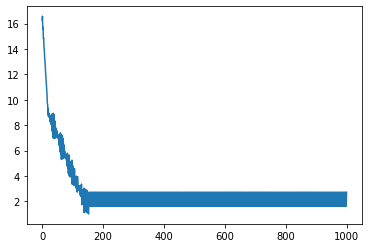

In [20]:
plt.plot(losses)

In [23]:
aux = 0 
for x in X:
    print("Prediction:", predict(alpha,X,k2,x), "/ Real value:", Y[aux])
    aux+=1

Prediction: 1.424474211923553 / Real value: 1
Prediction: 1.0213391685373598 / Real value: 1
Prediction: 1.238244833052103 / Real value: 1
Prediction: 1.0334393222806808 / Real value: -1
